In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# these two lines are mapping the measurements class and the stations class -RSW
#   - is that "saving references to each table"? -RSW
measurements = Base.classes.measurement
stations = Base.classes.station

# Find the column headers in each table
# This line creates an "inspector object" for the target, engine -RSW
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
print('measurements table column headings:')
for c in columns:
    print(c['name'], c["type"])
print('\nstations table column headings:')
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

measurements table column headings:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

stations table column headings:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# session.query() returns a Query object
# .all() returns a list of everything returned in the Query object
sortedByDate = session.query(measurements).order_by(measurements.date).all()
print('Most Recent Measurement: ' + sortedByDate[-1].date)

Most Recent Measurement: 2017-08-23


In [20]:
#### get the info out of each measurement object and then put everything into a DataFrame ####
id_list = []
station_list = []
date_list = []
prcp_list = []
tobs_list = []
for measurement in sortedByDate:
    id_list.append(measurement.id)
    station_list.append(measurement.station)
    date_list.append(measurement.date)
    prcp_list.append(measurement.prcp)
    tobs_list.append(measurement.tobs)

measurementsDict = {
    'ID': id_list,
    'Station': station_list,
    'Date': date_list,
    'PRCP': prcp_list,
    'TOBS': tobs_list
}
measurementsDF = pd.DataFrame(measurementsDict)

#### pare it down to the last six months ####

# six months multiplied by the approx average number of days in a month
sixMonthsInDays = int(6*30.5)
# use np.datetime64 and np.timedelta64 to get the date six months before the last measurement
firstDate = np.datetime64(measurementsDF.iloc[-1,:]['Date']) - np.timedelta64(sixMonthsInDays, 'D')
# now use .loc to remove measurements taken before firstDate
measurementsDF = measurementsDF.loc[measurementsDF['Date']>=str(firstDate),:]
measurementsDF = measurementsDF[['Date','PRCP']]
measurementsDF = measurementsDF.set_index('Date')
measurementsDF = measurementsDF.sort_index() # I believe it was already sorted by date...
measurementsDF.head()

,PRCP
Date,
2017-02-21,0.06
2017-02-21,0.00
2017-02-21,0.00
2017-02-21,NaN
2017-02-21,0.00


<AxesSubplot:xlabel='Date'>

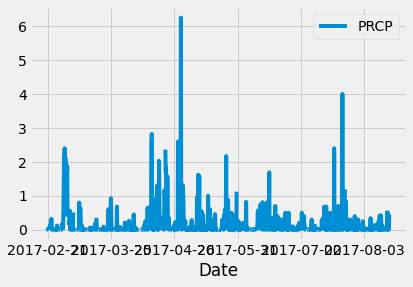

In [21]:
# plot the results using DataFrame.plot()
measurementsDF.plot()

In [23]:
# Use Pandas to print the summary statistics for the precipitation data
measurementsDF.describe()

,PRCP
count,981.000000
mean,0.164363
std,0.421057
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()